In [1]:
import pandas as pd

In [163]:
import seaborn as sns

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
data = pd.read_csv('../Datasets/cleaned_egypt_tech_salary.csv')

In [66]:
data.head()

,timestamp,title,Years of Experiences,salary,salaryDate,companyCountry,worktype,workhour,city,currency
0,2025-07-16 05:21:22,Front End,2,20000.0,2025-06-30,Egyption and site in egypt,Remote,Full Time,Cairo,EGP
1,2025-07-16 05:53:52,Full Stack .Net | Angular,3,26000.0,2025-07-01,Egyption and site in egypt,Remote,Full Time,Cairo,EGP
2,2025-07-16 05:56:21,.Net Developsr,2,14000.0,2025-06-01,Egyption and site in egypt,Remote,Full Time,Cairo,EGP
3,2025-07-16 05:58:59,IT Specialist,0,10000.0,2025-05-01,Egyption and site in egypt,On Site,Full Time,Cairo,EGP
4,2025-07-16 05:59:28,Front end,1,40000.0,2025-07-16,Not Egyption but site in egypt,Hybrid,Full Time,Cairo,EGP


### Feature Engineering

## 1. Feature Selection & Preprocessing

In [70]:
data.drop(columns='timestamp', inplace=True)

In [72]:
data.columns

Index(['title', 'Years of Experiences ', 'salary', 'salaryDate',
       'companyCountry', 'worktype', 'workhour', 'city', 'currency'],
      dtype='object')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  792 non-null    object 
 1   Years of Experiences   792 non-null    int64  
 2   salary                 790 non-null    float64
 3   salaryDate             790 non-null    object 
 4   companyCountry         792 non-null    object 
 5   worktype               792 non-null    object 
 6   workhour               792 non-null    object 
 7   city                   792 non-null    object 
 8   currency               792 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 55.8+ KB


In [76]:
data['salaryDate'] = pd.to_datetime(data['salaryDate'])

In [78]:
data['currency'].unique()

array(['EGP', 'USD', 'AED', 'SAR', 'EUR'], dtype=object)

In [80]:
data['city'].unique()

array(['Cairo', 'Multi Site', 'Dubai', 'Australia', 'Alexandria',
       'Kuwait', 'Riyadh', 'London', 'Giza', 'Jordan ', 'California',
       'Mansoura', 'Manama', 'Canada', 'Beni Suef', 'Berlin', 'Lebnanon',
       'Minya', 'Tanta', 'Else', '6th of October', 'Shiekh zayed', 'USA',
       'Jeddah', 'Georgia', 'Suez', 'Poland', 'Abu Dhabi', 'Marsa Alam',
       'New York', 'Amman', 'Obour City ', 'New Administrative capital ',
       'France', 'Zagazig', 'Vancouver', 'Nasr City', 'Warsaw', 'Munich',
       'Oman', '10th of Ramadan', 'Denmark', 'Montreal', 'Kuwait ',
       'rabat', 'Zurich', 'Shorouk', 'Baghdad', 'Magdeburg'], dtype=object)

In [82]:
data['worktype'].unique()

array(['Remote', 'On Site', 'Hybrid'], dtype=object)

In [84]:
data['workhour'].unique()

array(['Full Time', 'Part Time'], dtype=object)

In [86]:
data['companyCountry'].unique()

array(['Egyption and site in egypt', 'Not Egyption but site in egypt',
       'Else', 'Not Egyption and site out of egypt',
       'Egyptian and site out of Egypt'], dtype=object)

In [88]:
data['salaryDate'].isnull().sum()

2

In [94]:
data.dropna(subset=['salaryDate','salary'], inplace=True)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 791
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  788 non-null    object        
 1   Years of Experiences   788 non-null    int64         
 2   salary                 788 non-null    float64       
 3   salaryDate             788 non-null    datetime64[ns]
 4   companyCountry         788 non-null    object        
 5   worktype               788 non-null    object        
 6   workhour               788 non-null    object        
 7   city                   788 non-null    object        
 8   currency               788 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 61.6+ KB


In [98]:
data['Years of Experiences '].unique()

array([ 2,  3,  0,  1,  6,  4,  5,  9, 17,  7, 10,  8, 13, 15, 12, 11, 18],
      dtype=int64)

### Some Preprocessing on title column -> converted to category

In [119]:
data['title'].unique()

array(['Front End', 'Full Stack .Net | Angular', '.Net Developsr',
       'IT Specialist', 'Front end', 'Email Marketing', 'Email marketing',
       'Gmail marketing', 'CRM Developer', 'PHP developer',
       'Flutter developer', 'Storage&Backup admin',
       'Senior front end engineer', 'Flutter Developer',
       'Full stack. Net developer', 'Software QC Engineer',
       'mid level frontend react', 'Embedded Software Engineer',
       'Procurement Engineer', 'Senior Dot net developer',
       'Software engineer', 'Frontend Engineer', '.net junior',
       'Sw testing engineer', 'Mobile Engineer',
       'Data Scientist & Generative AI engineer', 'Fullstack (php ,vue)',
       'software engineer', 'Data Engineer', 'Backend Developer',
       'Java Developer', 'Senior software developer',
       'Computer Vision Engineer', 'Node.js developer',
       'Frontend developer', 'Backend Developer - PHP Laravel',
       'Software Engineer( Mobile react native , backend django)',
       'Sof

In [102]:
import re

def clean_title(title):
    title = title.strip().lower()
    title = re.sub(r'\s+', ' ', title)  # normalize spaces
    title = title.replace('.net', '.NET').replace('php', 'PHP')
    # Add more replacements as needed...
    return title

data['title_clean'] = data['title'].apply(clean_title)

In [106]:
def categorize_title(title):
    if any(word in title for word in ['frontend', 'backend', 'full stack', '.net', 'php', 'java', 'developer', 'engineer', 'react', 'angular', 'flutter', 'node']):
        return 'Software Development'
    elif any(word in title for word in ['data', 'ml', 'ai', 'bi', 'analytics', 'scientist']):
        return 'Data & AI'
    elif any(word in title for word in ['it support', 'network', 'system admin', 'infrastructure', 'security', 'devops']):
        return 'IT & Infrastructure'
    elif any(word in title for word in ['product', 'project manager', 'scrum', 'team lead']):
        return 'Product & Management'
    elif any(word in title for word in ['qa', 'qc', 'tester', 'testing']):
        return 'Quality Assurance & Testing'
    elif any(word in title for word in ['mechanical', 'electrical', 'civil', 'embedded']):
        return 'Other Engineering'
    elif any(word in title for word in ['marketing', 'hr', 'accountant', 'sales']):
        return 'Non-Technical Roles'
    else:
        return 'Other / Unclassified'

data['category'] = data['title_clean'].apply(categorize_title)

In [110]:
data['title_clean'].unique()

array(['front end', 'full stack .NET | angular', '.NET developsr',
       'it specialist', 'email marketing', 'gmail marketing',
       'crm developer', 'PHP developer', 'flutter developer',
       'storage&backup admin', 'senior front end engineer',
       'full stack. net developer', 'software qc engineer',
       'mid level frontend react', 'embedded software engineer',
       'procurement engineer', 'senior dot net developer',
       'software engineer', 'frontend engineer', '.NET junior',
       'sw testing engineer', 'mobile engineer',
       'data scientist & generative ai engineer', 'fullstack (PHP ,vue)',
       'data engineer', 'backend developer', 'java developer',
       'senior software developer', 'computer vision engineer',
       'node.js developer', 'frontend developer',
       'backend developer - PHP laravel',
       'software engineer( mobile react native , backend django)',
       'software tester', 'full stack developer (angular+.NET)',
       'software testing', 

In [112]:
import re

# Common typo corrections
typo_map = {
    'deveoper': 'developer',
    'developsr': 'developer',
    'developei': 'developer',
    'dot net': '.net',
    'fulkstack': 'fullstack',
    'full-stack': 'full stack',
    'mern-stack': 'mern stack',
    'front-end': 'frontend',
    'back-end': 'backend',
    'font end': 'frontend',
    'senuor': 'senior',
    'engin': 'engineer',
}

def clean_title(title):
    # Lowercase
    title = title.lower()
    # Remove punctuation
    title = re.sub(r'[^\w\s]', ' ', title)
    # Replace multiple spaces with one
    title = re.sub(r'\s+', ' ', title).strip()
    # Correct typos
    for typo, correction in typo_map.items():
        title = title.replace(typo, correction)
    return title

def categorize_title(title):
    title = clean_title(title)
    
    # Priority-based category matching
    if any(word in title for word in [
        'frontend', 'backend', 'full stack', '.net', 'php', 'java', 'developer',
        'engineer', 'react', 'angular', 'flutter', 'node', 'golang', 'vue',
        'ios', 'android', 'mobile', 'unity', 'unreal'
    ]):
        return 'Software Development'
    
    elif any(word in title for word in [
        'data', 'machine learning', 'ml', 'ai', 'bi', 'analytics',
        'scientist', 'bigdata', 'nlp', 'computer vision'
    ]):
        return 'Data & AI'
    
    elif any(word in title for word in [
        'it support', 'network', 'system admin', 'infrastructure', 'security',
        'devops', 'cloud', 'cybersecurity', 'd365', 'crm'
    ]):
        return 'IT & Infrastructure'
    
    elif any(word in title for word in [
        'product', 'project manager', 'scrum', 'team lead', 'owner', 'manager'
    ]):
        return 'Product & Management'
    
    elif any(word in title for word in [
        'qa', 'qc', 'tester', 'testing', 'quality assurance', 'quality control'
    ]):
        return 'Quality Assurance & Testing'
    
    elif any(word in title for word in [
        'mechanical', 'electrical', 'civil', 'embedded', 'biomedical',
        'electronics', 'automation', 'maintenance'
    ]):
        return 'Other Engineering'
    
    elif any(word in title for word in [
        'marketing', 'hr', 'accountant', 'sales', 'liaison', 'analyst', 'purchasing'
    ]):
        return 'Non-Technical Roles'
    
    else:
        return 'Other / Unclassified'

# Apply
data['title_clean'] = data['title_clean'].apply(clean_title)
data['category'] = data['title_clean'].apply(categorize_title)


In [116]:
data['category'].unique()

array(['Other / Unclassified', 'Software Development', 'Data & AI',
       'Quality Assurance & Testing', 'Product & Management',
       'Other Engineering', 'IT & Infrastructure', 'Non-Technical Roles'],
      dtype=object)

In [121]:
data.head()

,title,Years of Experiences,salary,salaryDate,companyCountry,worktype,workhour,city,currency,title_clean,category
0,Front End,2,20000.0,2025-06-30,Egyption and site in egypt,Remote,Full Time,Cairo,EGP,front end,Other / Unclassified
1,Full Stack .Net | Angular,3,26000.0,2025-07-01,Egyption and site in egypt,Remote,Full Time,Cairo,EGP,full stack net angular,Software Development
2,.Net Developsr,2,14000.0,2025-06-01,Egyption and site in egypt,Remote,Full Time,Cairo,EGP,net developer,Software Development
3,IT Specialist,0,10000.0,2025-05-01,Egyption and site in egypt,On Site,Full Time,Cairo,EGP,it specialist,Other / Unclassified
4,Front end,1,40000.0,2025-07-16,Not Egyption but site in egypt,Hybrid,Full Time,Cairo,EGP,front end,Other / Unclassified


In [123]:
data.drop(columns=['title', 'title_clean'], inplace=True)

In [125]:
data.head()

,Years of Experiences,salary,salaryDate,companyCountry,worktype,workhour,city,currency,category
0,2,20000.0,2025-06-30,Egyption and site in egypt,Remote,Full Time,Cairo,EGP,Other / Unclassified
1,3,26000.0,2025-07-01,Egyption and site in egypt,Remote,Full Time,Cairo,EGP,Software Development
2,2,14000.0,2025-06-01,Egyption and site in egypt,Remote,Full Time,Cairo,EGP,Software Development
3,0,10000.0,2025-05-01,Egyption and site in egypt,On Site,Full Time,Cairo,EGP,Other / Unclassified
4,1,40000.0,2025-07-16,Not Egyption but site in egypt,Hybrid,Full Time,Cairo,EGP,Other / Unclassified


### end of title column preprocessing

In [129]:
data['day'] = data['salaryDate'].dt.day

In [131]:
data['month'] = data['salaryDate'].dt.month

In [133]:
data['year'] = data['salaryDate'].dt.year

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 791
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Years of Experiences   788 non-null    int64         
 1   salary                 788 non-null    float64       
 2   salaryDate             788 non-null    datetime64[ns]
 3   companyCountry         788 non-null    object        
 4   worktype               788 non-null    object        
 5   workhour               788 non-null    object        
 6   city                   788 non-null    object        
 7   currency               788 non-null    object        
 8   category               788 non-null    object        
 9   day                    788 non-null    int32         
 10  month                  788 non-null    int32         
 11  year                   788 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(6)
memor

In [137]:
data.drop(columns=['salaryDate'], inplace=True)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 791
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Years of Experiences   788 non-null    int64  
 1   salary                 788 non-null    float64
 2   companyCountry         788 non-null    object 
 3   worktype               788 non-null    object 
 4   workhour               788 non-null    object 
 5   city                   788 non-null    object 
 6   currency               788 non-null    object 
 7   category               788 non-null    object 
 8   day                    788 non-null    int32  
 9   month                  788 non-null    int32  
 10  year                   788 non-null    int32  
dtypes: float64(1), int32(3), int64(1), object(6)
memory usage: 64.6+ KB


### Encoding Catorical Columns

In [143]:
data['category'] = data['category'].replace({'Other / Unclassified' : 0, 'Software Development':1, 'Data & AI':2,
       'Quality Assurance & Testing':3, 'Product & Management':4,
       'Other Engineering':5, 'IT & Infrastructure':6, 'Non-Technical Roles':7})

C:\Users\Malak\AppData\Local\Temp\ipykernel_28856\3752224945.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['category'] = data['category'].replace({'Other / Unclassified' : 0, 'Software Development':1, 'Data & AI':2,


In [145]:
data['category'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [147]:
data['currency'] = data['currency'].replace({'EGP':0, 'USD':1, 'AED':2, 'SAR':3, 'EUR':4})

C:\Users\Malak\AppData\Local\Temp\ipykernel_28856\1234476090.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['currency'] = data['currency'].replace({'EGP':0, 'USD':1, 'AED':2, 'SAR':3, 'EUR':4})


In [149]:
data['city'] = data['city'].replace({'Cairo':0, 'Multi Site':1, 'Dubai':2, 'Australia':3, 'Alexandria':4,
       'Kuwait':5, 'Riyadh':6, 'London':7, 'Giza':8, 'Jordan ':9, 'California':10,
       'Mansoura':11, 'Manama':12, 'Canada':13, 'Beni Suef':14, 'Berlin':15, 'Lebnanon':16,
       'Minya':17, 'Tanta':18, 'Else':19, '6th of October':20, 'Shiekh zayed':21, 'USA':22,
       'Jeddah':23, 'Georgia':24, 'Suez':25, 'Poland':26, 'Abu Dhabi':27, 'Marsa Alam':28,
       'New York':29, 'Amman':30, 'Obour City ':31, 'New Administrative capital ':32,
       'France':33, 'Zagazig':34, 'Vancouver':35, 'Nasr City':36, 'Warsaw':37, 'Munich':38,
       'Oman':39, '10th of Ramadan':40, 'Denmark':41, 'Montreal':42, 'Kuwait ':43,
       'rabat':44, 'Zurich':45, 'Shorouk':46, 'Baghdad':47, 'Magdeburg':48})

C:\Users\Malak\AppData\Local\Temp\ipykernel_28856\3269279377.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['city'] = data['city'].replace({'Cairo':0, 'Multi Site':1, 'Dubai':2, 'Australia':3, 'Alexandria':4,


In [153]:
data['workhour'] = data['workhour'].replace({'Full Time':1, 'Part Time':0})

C:\Users\Malak\AppData\Local\Temp\ipykernel_28856\2620419278.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['workhour'] = data['workhour'].replace({'Full Time':1, 'Part Time':0})


In [155]:
data['worktype'] = data['worktype'].replace({'Remote':0, 'On Site':1, 'Hybrid':2})

C:\Users\Malak\AppData\Local\Temp\ipykernel_28856\132741261.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['worktype'] = data['worktype'].replace({'Remote':0, 'On Site':1, 'Hybrid':2})


In [157]:
data['companyCountry'] = data['companyCountry'].replace({'Egyption and site in egypt':0, 'Not Egyption but site in egypt':1,
       'Else':2, 'Not Egyption and site out of egypt':3,
       'Egyptian and site out of Egypt':4})

C:\Users\Malak\AppData\Local\Temp\ipykernel_28856\1642961426.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['companyCountry'] = data['companyCountry'].replace({'Egyption and site in egypt':0, 'Not Egyption but site in egypt':1,


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 791
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Years of Experiences   788 non-null    int64  
 1   salary                 788 non-null    float64
 2   companyCountry         788 non-null    int64  
 3   worktype               788 non-null    int64  
 4   workhour               788 non-null    int64  
 5   city                   788 non-null    int64  
 6   currency               788 non-null    int64  
 7   category               788 non-null    int64  
 8   day                    788 non-null    int32  
 9   month                  788 non-null    int32  
 10  year                   788 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 64.6 KB


#### NOTE: apply correlation after encoding

In [173]:
corr = data.corr()
corr

,Years of Experiences,salary,companyCountry,worktype,workhour,city,currency,category,day,month,year
Years of Experiences,1.000000,0.319808,0.139489,-0.038217,0.053948,0.032140,0.207923,0.083581,-0.009520,-0.099122,-0.013267
salary,0.319808,1.000000,0.016724,0.224482,0.048080,-0.089833,-0.281163,0.016431,-0.015764,-0.177484,-0.045870
companyCountry,0.139489,0.016724,1.000000,-0.327996,-0.014361,0.373594,0.394882,-0.067451,0.010327,-0.006462,0.025990
worktype,-0.038217,0.224482,-0.327996,1.000000,0.055967,-0.221912,-0.228534,0.034136,0.047925,-0.022451,0.004146
workhour,0.053948,0.048080,-0.014361,0.055967,1.000000,0.022114,0.045683,0.020017,0.025477,-0.071455,0.032171
city,0.032140,-0.089833,0.373594,-0.221912,0.022114,1.000000,0.307938,-0.061522,0.003818,-0.001489,-0.020408
currency,0.207923,-0.281163,0.394882,-0.228534,0.045683,0.307938,1.000000,-0.064385,-0.013600,0.045407,0.034473
category,0.083581,0.016431,-0.067451,0.034136,0.020017,-0.061522,-0.064385,1.000000,0.042923,0.037278,0.030532
day,-0.009520,-0.015764,0.010327,0.047925,0.025477,0.003818,-0.013600,0.042923,1.000000,0.257816,0.012484
month,-0.099122,-0.177484,-0.006462,-0.022451,-0.071455,-0.001489,0.045407,0.037278,0.257816,1.000000,-0.000938


<Axes: >

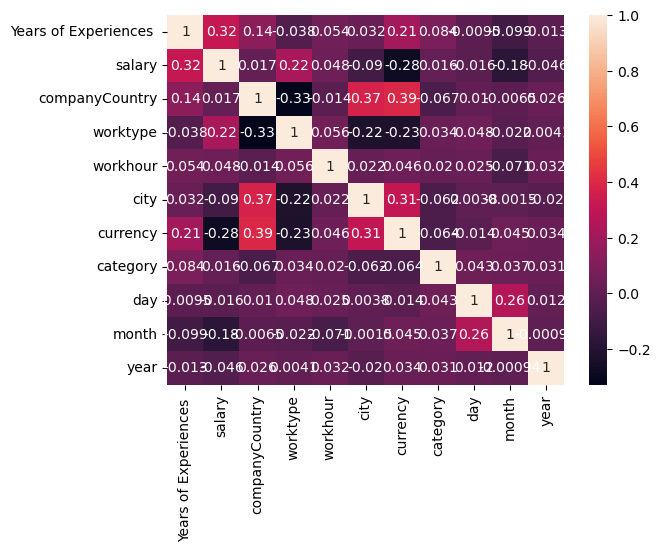

In [175]:
sns.heatmap(corr, annot=True)

### Train Test Split

In [179]:
x = data.drop(columns=['salary'])  # features
y = data['salary']                 # target

In [181]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

### 3. Scaling

In [185]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelling

In [187]:
from sklearn.ensemble import RandomForestRegressor

In [189]:
model = RandomForestRegressor(random_state=42)

In [191]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [193]:
y_pred = model.predict(X_test_scaled)

In [197]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [201]:
# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# --- TEST SET METRICS ---
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\n Test Set Evaluation:")
print(f"  MAE:  {mae_test}")
print(f"  RMSE: {rmse_test}")
print(f"  R²:   {r2_test}")

# --- TRAIN SET METRICS ---
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

print(" Train Set Evaluation:")
print(f"  MAE:  {mae_train}")
print(f"  RMSE: {rmse_train}")
print(f"  R²:   {r2_train}")


 Test Set Evaluation:
  MAE:  16135.742231569942
  RMSE: 25459.863353250814
  R²:   0.31310854978653313
 Train Set Evaluation:
  MAE:  6203.334565403601
  RMSE: 9081.495536222263
  R²:   0.8746960237883763


# Save Model

In [204]:
import joblib

In [206]:
joblib.dump(model, "salary_predictor.pkl")

['salary_predictor.pkl']

In [214]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [208]:
loaded_model = joblib.load("salary_predictor.pkl")

In [210]:
y_pred = loaded_model.predict(X_test_scaled)

In [212]:
y_pred

array([ 58746.35428571,    768.        ,   1825.29      ,  48877.135     ,
        17716.9822619 ,   1200.7       ,  14608.46      ,  24340.1       ,
         2723.52      ,  44326.66666667,  43924.85      ,  12443.07      ,
        30448.33      ,  31586.97916667,  17249.85      ,  11688.83333333,
         1097.83      ,  39798.59      ,   8784.80333333,  23985.78333333,
        24292.75      ,   1960.5       ,  57351.66666667,  62631.26666667,
        54170.        ,  18762.25478688,  28321.664     ,  50740.39333333,
        31208.3       ,  18388.97      ,  28526.32      ,  18351.32      ,
        45148.7       ,  53885.26666667,  42821.02333333,   1056.2       ,
        34257.39      ,  11239.9       ,  12273.78666667,  20608.        ,
        19994.02      ,  29875.17      ,   9307.8       ,  38860.63333333,
        17858.96      ,  60354.18      ,   9271.23666667,  17059.53      ,
        16992.13      ,   1739.        ,   1948.86      ,  14450.99420968,
        21136.94490232,  